## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plot

## Loading the data

In [2]:
train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Visualization of data

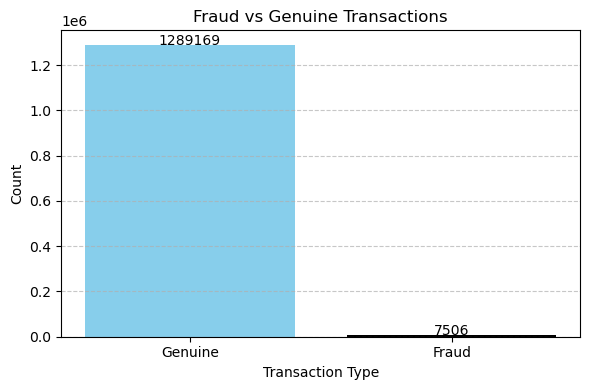

In [6]:
import matplotlib.pyplot as plt

# Count fraud and genuine
counts = train_data['is_fraud'].value_counts().sort_index()
labels = ['Genuine', 'Fraud']

# Create bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['skyblue', 'black'])
plt.title('Fraud vs Genuine Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on top
for i, v in enumerate(counts):
    plt.text(i, v + 50, str(v), ha='center')

plt.tight_layout()
plt.show()


## Data Cleaning

In [7]:
cols = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_data.drop(columns=cols,inplace=True)
test_data.drop(columns=cols,inplace=True)

In [8]:
train_data.shape,test_data.shape

((1296675, 14), (555719, 14))

### Handling date and time

In [9]:
train_data['trans_date_trans_time']=pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date']=train_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_data['trans_date']=pd.to_datetime(train_data['trans_date'])
train_data['dob']=pd.to_datetime(train_data['dob'])

In [10]:
test_data['trans_date_trans_time']=pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date']=test_data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_data['trans_date']=pd.to_datetime(test_data['trans_date'])
test_data['dob']=pd.to_datetime(test_data['dob'])

## Preprocessing data

test_data['trans_date']

In [11]:
test_data['dob']

0        1968-03-19
1        1990-01-17
2        1970-10-21
3        1987-07-25
4        1955-07-06
            ...    
555714   1966-02-13
555715   1999-12-27
555716   1981-11-29
555717   1965-12-15
555718   1993-05-10
Name: dob, Length: 555719, dtype: datetime64[ns]

In [12]:
train_data["age"] = train_data["trans_date"]-train_data["dob"]

In [13]:
train_data['age']=train_data['age']/365.25

In [14]:
test_data["age"] = test_data["trans_date"]-test_data["dob"]

In [15]:
test_data["age"]=test_data["age"]/365.25

In [16]:
train_data['trans_month'] = pd.DatetimeIndex(train_data['trans_date']).month
train_data['trans_year'] = pd.DatetimeIndex(train_data['trans_date']).year

In [17]:
#Calculate distance between merchant and home location
train_data['latitudinal_distance'] = abs(round(train_data['merch_lat']-train_data['lat'],3))
train_data['longitudinal_distance'] = abs(round(train_data['merch_long']-train_data['long'],3))

test_data['latitudinal_distance'] = abs(round(test_data['merch_lat']-test_data['lat'],3))
test_data['longitudinal_distance'] = abs(round(test_data['merch_long']-test_data['long'],3))

In [18]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [19]:
# Convert categorical column gender into numerical 
train_data.gender=train_data.gender.apply(lambda x: 1 if x=="M" else 0)
test_data.gender=test_data.gender.apply(lambda x: 1 if x=="M" else 0)

In [20]:
#One Hot Encoding of Category column
train_data = pd.get_dummies(train_data, columns=['category'], prefix='category')
test_data = pd.get_dummies(test_data, columns=['category'], prefix='category')

test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [21]:
train_data.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30 days 19:32:53.716632443,1,2019,0.068,0.870,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,40 days 12:44:50.759753593,1,2019,0.271,0.024,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,56 days 22:48:02.956878850,1,2019,0.970,0.108,True,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,51 days 23:16:37.946611909,1,2019,0.804,0.447,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,32 days 18:19:57.535934291,1,2019,0.254,0.830,False,...,False,False,False,False,False,True,False,False,False,False


In [22]:
train_data.to_csv('cleaned_train_data.csv')
test_data.to_csv('cleaned_test_data.csv')

In [23]:
train_data['age']=train_data['age'].dt.days

In [24]:
test_data['age']=test_data['age'].dt.days

# Splitting the data

In [25]:
x_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
x_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# Imbalance

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train, y_train = smote.fit_resample(x_train, y_train)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Random Forest Classifer 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(f'Accuracy : {accuracy_score(y_pred, y_test)}')


Accuracy : 0.9965954016328397


In [32]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.79      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.90      0.82    555719
weighted avg       1.00      1.00      1.00    555719



# saving the model

In [31]:
import pickle
pickle.dump(clf,open('random_forest_model.pkl','wb'))